In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv('../data/final_df.csv')
df.head()

,PC1,PC2,PC3,PC4,PC5,PC7,PC9,PC10,target
0,1.130664,-1.087655,3.164263,2.293052,0.023175,0.664854,-1.495392,-0.499485,0
1,3.190926,-1.417885,-0.533715,-0.857970,-0.006289,-0.259063,0.342524,1.431509,1
2,3.124339,0.657008,-0.285134,-0.626641,0.152793,-0.324995,0.043205,0.462304,1
3,-0.484339,1.410972,0.397806,2.832741,0.721309,-0.522221,0.760079,0.228379,0
4,-2.284542,-0.330033,-0.072260,1.209318,0.770835,0.379567,1.050381,0.628110,0


In [15]:
X = df.drop('target', axis=1)
y = df['target']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
#--------------
dr = DecisionTreeClassifier()
dr.fit(X_train, y_train)
#--------------
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
#-------------
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [21]:
y_pred = logistic.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8
Precision: 0.75
Recall: 0.8076923076923077
F1 Score: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82        34
           1       0.75      0.81      0.78        26

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60

Confusion Matrix:
 [[27  7]
 [ 5 21]]


In [29]:
y_pred = dr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7333333333333333
Precision: 0.7083333333333334
Recall: 0.6538461538461539
F1 Score: 0.68

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77        34
           1       0.71      0.65      0.68        26

    accuracy                           0.73        60
   macro avg       0.73      0.72      0.73        60
weighted avg       0.73      0.73      0.73        60

Confusion Matrix:
 [[27  7]
 [ 9 17]]


In [30]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8
Precision: 0.75
Recall: 0.8076923076923077
F1 Score: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82        34
           1       0.75      0.81      0.78        26

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60

Confusion Matrix:
 [[27  7]
 [ 5 21]]


In [32]:
y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8
Precision: 0.75
Recall: 0.8076923076923077
F1 Score: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82        34
           1       0.75      0.81      0.78        26

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60

Confusion Matrix:
 [[27  7]
 [ 5 21]]


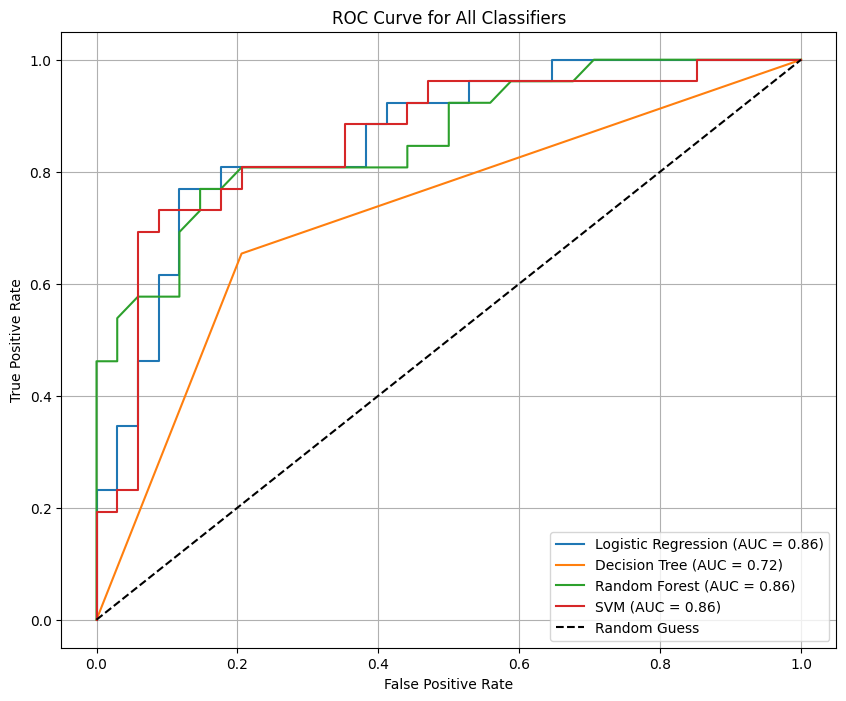

In [35]:
# ROC Curve & AUC Score for all classifiers
plt.figure(figsize=(10, 8))
models = {
    'Logistic Regression': logistic,
    'Decision Tree': dr,
    'Random Forest': rf,
    'SVM': svm
}

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        # For SVM without probability, use decision_function
        y_score = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Classifiers')
plt.legend(loc='lower right')
plt.grid()
plt.show()
